<a href="https://colab.research.google.com/github/TOOBANOOR123/DataScience_BootCamp/blob/main/Classification_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

## load A dataset

In [4]:
iris= load_iris()
iris.keys()

dict_keys=(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
#convert into pandas dataframe

In [8]:
df_iris= pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


The iris data frame contains the length and width of sepals and petals including the target column which is the numerical representation of classes of Iris flowers that we need to classify (eg: Setosa(0), Versicolor(1), Virginica(2) ).

In [10]:
##creating oen variable for species
species = []

for i in range(len(iris['target'])):
    if df_iris['target'][i] == 0:
        species.append("setosa")
    elif df_iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


df_iris['species'] = species

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [12]:
df_iris.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50


In [13]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [16]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visuallising the dataframe

In [ ]:
## Visuallising the dataframe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

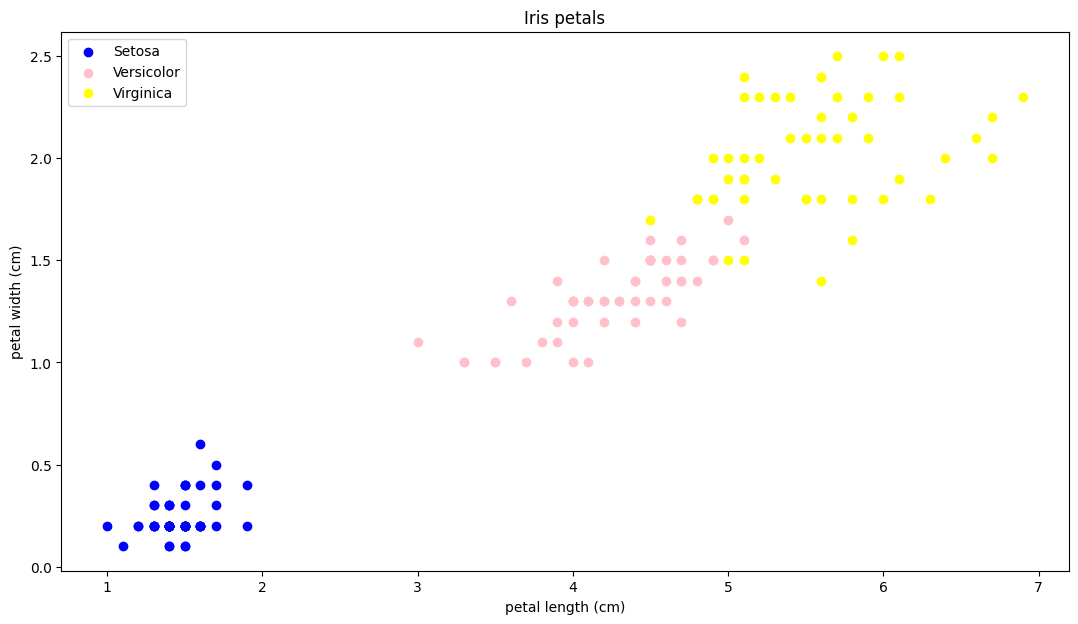

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
setosa = df_iris[df_iris.species == "setosa"]
versicolor = df_iris[df_iris.species == "versicolor"]
virginica = df_iris[df_iris.species == "virginica"]

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

#Label and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label = "Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label = "Versicolor", facecolor = "pink")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label = "Virginica", facecolor = "yellow")

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.set_title("Iris petals")
ax.legend()

In [19]:
import seaborn as sns

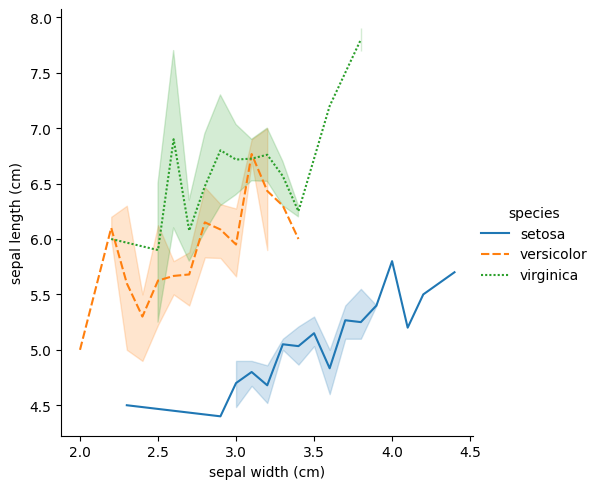

In [22]:
sns.relplot(x="sepal width (cm)", y="sepal length (cm)", data=df_iris,  kind='line', hue='species', style='species')

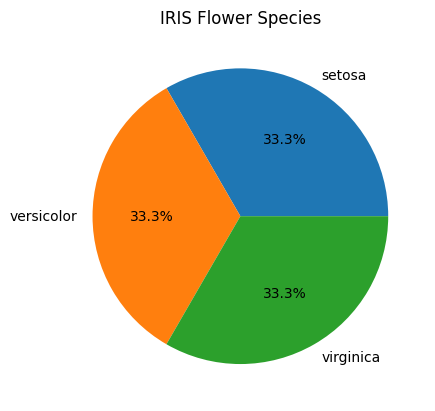

In [25]:
import matplotlib.pyplot as plt

#create fig
fig, ax = plt.subplots()
#data for pie chart
labels = ['setosa', 'versicolor', 'virginica']
sizes = [50, 50, 50]
#create the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

#label the pie chart
ax.set_title("IRIS Flower Species")
plt.show()

<ipython-input-27-09e29ba5028d>:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


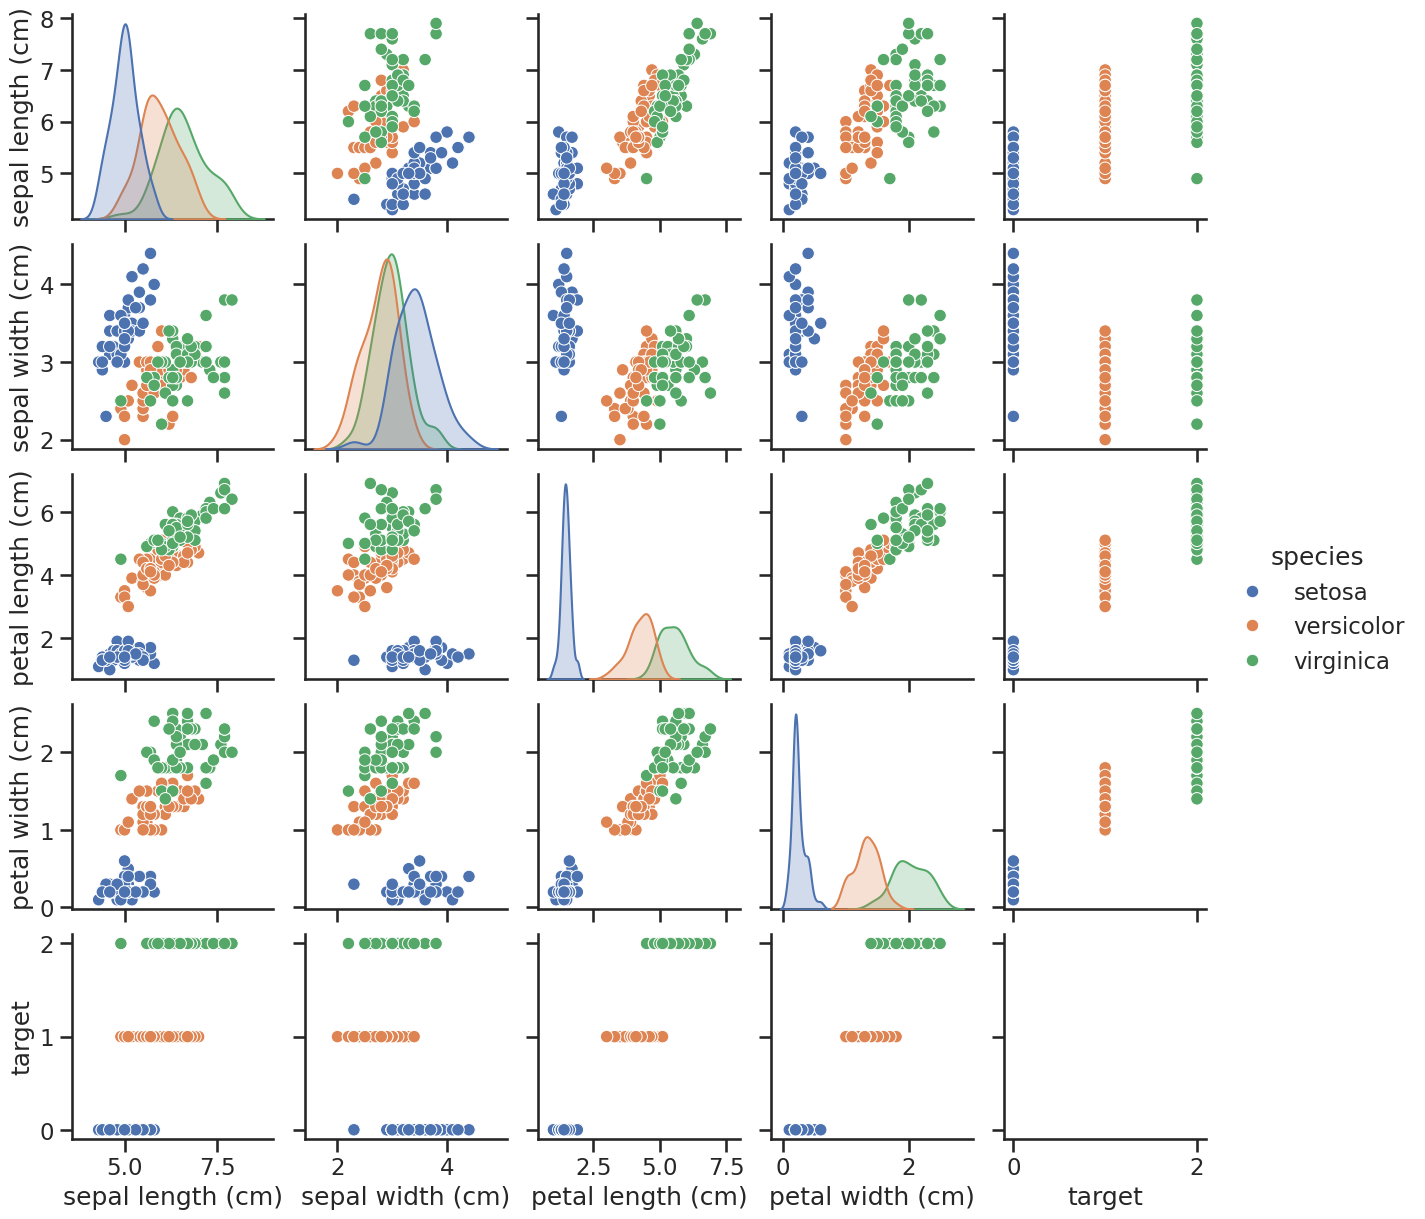

In [27]:
import seaborn as sns
# Visualize the whole dataset
# Set use_inf_as_na option to True

# Set the use_inf_as_na option to True
with pd.option_context("mode.use_inf_as_na", True):
    sns.set(style="ticks", context="talk")

# Create a pair plot
sns.pairplot(data=df_iris, hue='species')
plt.show()

## Train_Test split

In [28]:
X = df_iris.drop(['species', 'target'], axis = 1)
#converting to numpy array
X = X.to_numpy()[:, (2,3)]
y = df_iris['target']

#splitting using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3, random_state=42)
print(X_train, X_train.size, y_train, y_train.size)

[[1.4 0.3]
 [5.5 2.1]
 [6.  2.5]
 [1.3 0.2]
 [4.7 1.4]
 [4.6 1.5]
 [4.8 1.8]
 [4.7 1.4]
 [5.3 2.3]
 [1.6 0.2]
 [5.4 2.1]
 [4.2 1.5]
 [5.2 2. ]
 [3.5 1. ]
 [3.9 1.4]
 [4.6 1.4]
 [1.3 0.3]
 [4.6 1.3]
 [4.4 1.2]
 [1.5 0.2]
 [4.1 1.3]
 [6.3 1.8]
 [5.7 2.1]
 [1.5 0.4]
 [3.3 1. ]
 [5.7 2.5]
 [5.8 1.6]
 [1.4 0.1]
 [5.6 2.4]
 [1.4 0.2]
 [4.9 1.5]
 [6.1 1.9]
 [5.6 1.8]
 [4.1 1.3]
 [5.5 1.8]
 [4.4 1.3]
 [4.3 1.3]
 [4.9 2. ]
 [5.1 1.8]
 [1.7 0.2]
 [4.  1.3]
 [4.5 1.7]
 [1.2 0.2]
 [4.  1.2]
 [5.9 2.1]] 90 6      0.0
112    2.0
100    2.0
2      0.0
63     1.0
54     1.0
126    2.0
50     1.0
115    2.0
46     0.0
139    2.0
61     1.0
147    2.0
79     1.0
59     1.0
91     1.0
41     0.0
58     1.0
90     1.0
48     0.0
88     1.0
107    2.0
124    2.0
21     0.0
57     1.0
144    2.0
129    2.0
37     0.0
140    2.0
1      0.0
52     1.0
130    2.0
103    2.0
99     1.0
116    2.0
87     1.0
74     1.0
121    2.0
149    2.0
20     0.0
71     1.0
106    2.0
14     0.0
92     1.0
102    2.0
Name: 

In [30]:
X_train.size

90

##Feature Scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classifier algorithms

In [38]:
models = {
    "Logistic Regression ": LogisticRegression(),
    "K-Nearest Neighbors: ": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine: ": SVC(kernel = 'linear'),
    "Decision Tree: ": DecisionTreeClassifier(),
    "Random Forest: ": RandomForestClassifier(n_estimators=100),
    "Naive Bayes: ": GaussianNB(),
    "Neural Network: ": MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
}

In [42]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

====Logistic Regression ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.91      0.91        33
   virginica       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix: Logistic Regression 


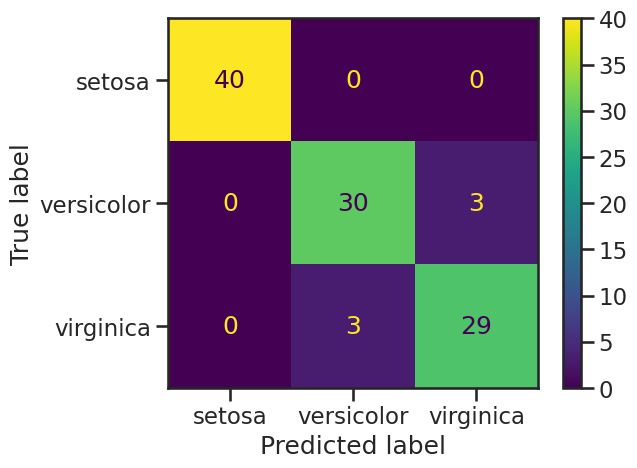

====K-Nearest Neighbors: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.91      0.91        33
   virginica       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix: K-Nearest Neighbors: 


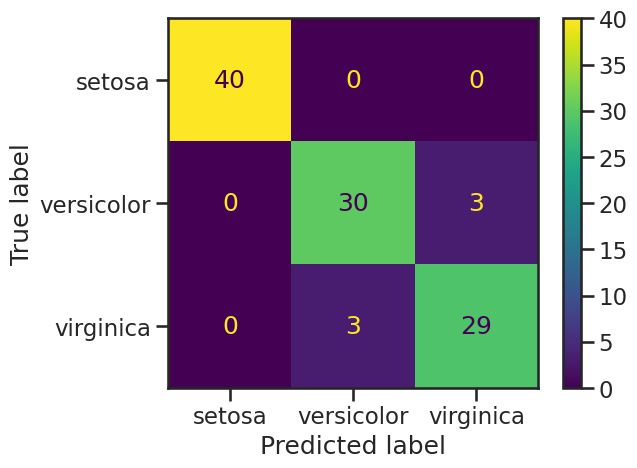

====Support Vector Machine: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.91      0.91        33
   virginica       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix: Support Vector Machine: 


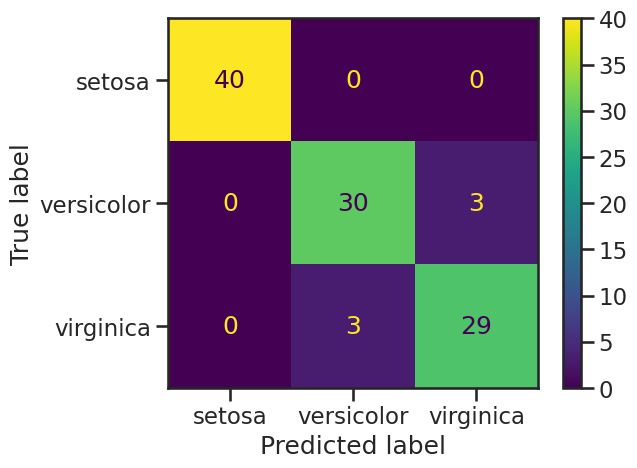

====Decision Tree: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.90      0.85      0.88        33
   virginica       0.85      0.91      0.88        32

    accuracy                           0.92       105
   macro avg       0.92      0.92      0.92       105
weighted avg       0.92      0.92      0.92       105

Confusion Matrix: Decision Tree: 


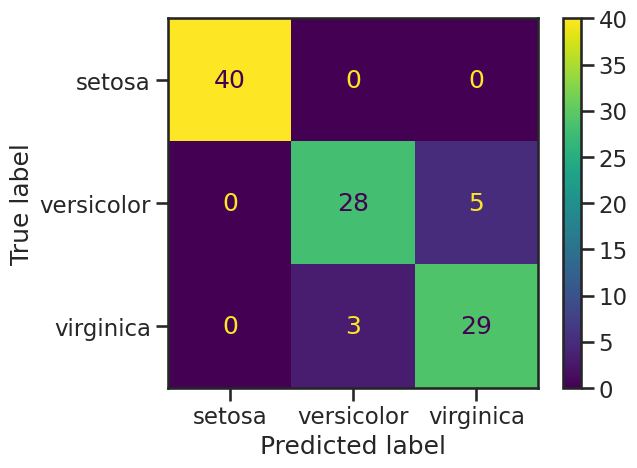

====Random Forest: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.91      0.91        33
   virginica       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix: Random Forest: 


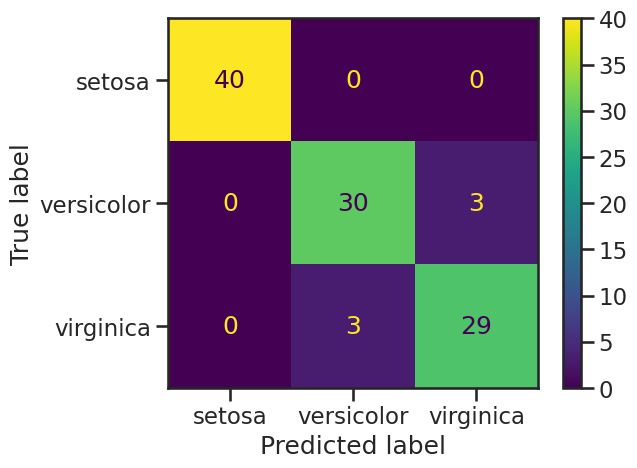

====Naive Bayes: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.94      0.91      0.92        33
   virginica       0.91      0.94      0.92        32

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Confusion Matrix: Naive Bayes: 


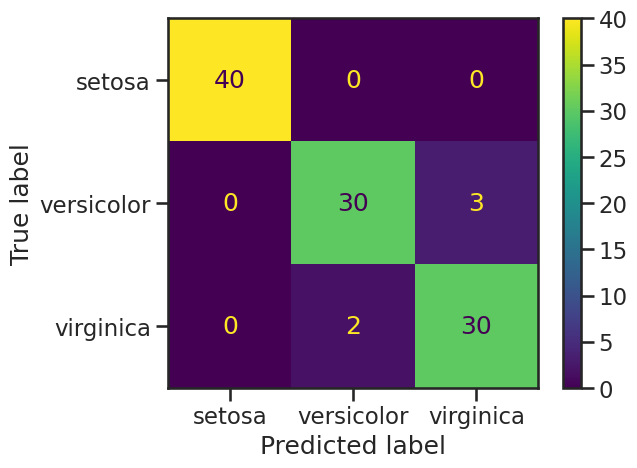

====Neural Network: ====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.91      0.91        33
   virginica       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Confusion Matrix: Neural Network: 


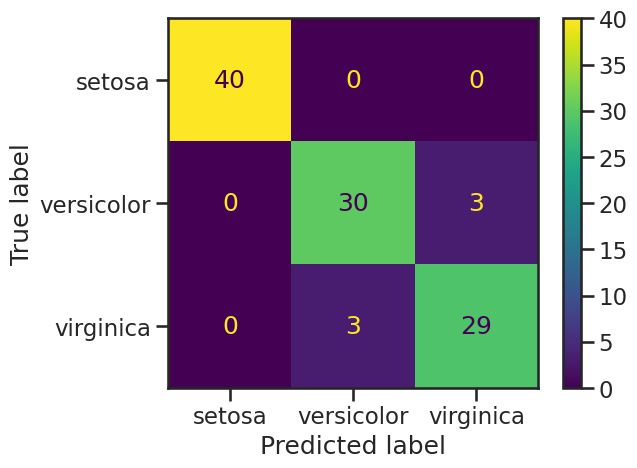

In [45]:
for name, model in models.items():
  print(f"===={name}====")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=iris.target_names))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)
  print(f"Confusion Matrix: {name}")
  plt.grid(False)
  plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
svm_class = SVC()
svm_class.fit(X_train, y_train), log_reg.fit(X_train,y_train)

(SVC(), LogisticRegression())

In [54]:
training_prediction = log_reg.predict(X_train)
training_prediction1 = svm_class.predict(X_train)
training_prediction, training_prediction1

(array([0., 2., 2., 0., 1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0.,
        1., 1., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1.,
        2., 1., 1., 2., 2., 0., 1., 1., 0., 1., 2.]),
 array([0., 2., 2., 0., 1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0.,
        1., 1., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1.,
        2., 1., 1., 2., 2., 0., 1., 1., 0., 1., 2.]))

In [55]:
test_prediction = log_reg.predict(X_test)
test_prediction1 = svm_class.predict(X_test)
test_prediction, test_prediction1

(array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
        1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
        0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2., 1.,
        2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
        0., 1., 2., 0., 2., 2., 1., 1., 2., 1., 0., 1., 2., 0., 0., 1., 2.,
        0., 2., 0., 0., 2., 1., 2., 2., 1., 2., 1., 0., 0., 1., 2., 0., 0.,
        0., 1., 2.]),
 array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
        1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
        0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2., 1.,
        2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
        0., 1., 2., 0., 2., 2., 1., 1., 2., 1., 0., 1., 2., 0., 0., 1., 2.,
        0., 2., 0., 0., 2., 1., 2., 2., 1., 2., 1., 0., 0., 1., 2., 0., 0.,
        0., 1., 2.]))

In [56]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_prediction), accuracy_score(y_test, test_prediction1)

(0.9428571428571428, 0.9428571428571428)

In [58]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.91      0.91      0.91        33
         2.0       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



In [59]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        10
         1.0      0.944     1.000     0.971        17
         2.0      1.000     0.944     0.971        18

    accuracy                          0.978        45
   macro avg      0.981     0.981     0.981        45
weighted avg      0.979     0.978     0.978        45

[[10  0  0]
 [ 0 17  0]
 [ 0  1 17]]


In [60]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        40
         1.0      0.909     0.909     0.909        33
         2.0      0.906     0.906     0.906        32

    accuracy                          0.943       105
   macro avg      0.938     0.938     0.938       105
weighted avg      0.943     0.943     0.943       105

[[40  0  0]
 [ 0 30  3]
 [ 0  3 29]]


## plot pair plot

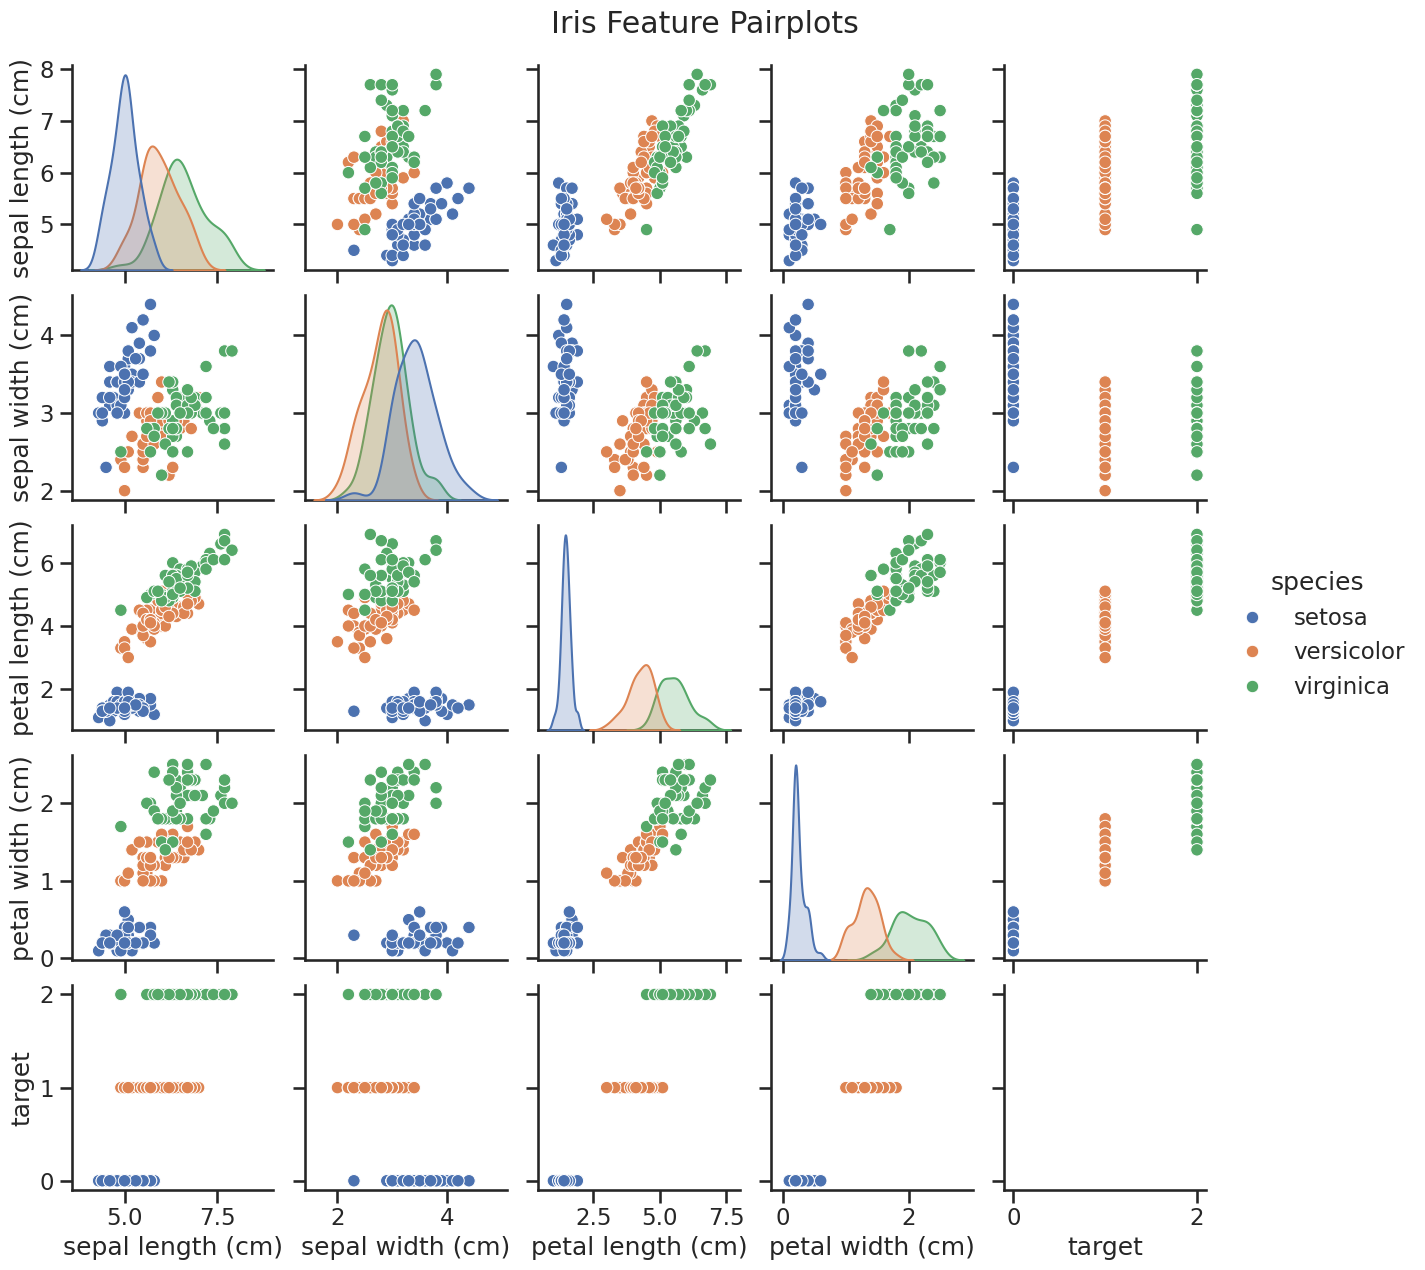

In [62]:
sns.pairplot(df_iris, hue="species")
plt.suptitle("Iris Feature Pairplots", y=1.02)
plt.show()